# Wine Quality Analysis
Q:-> You have two features as citrus acid content and Density of wine.
a) You have to calaulate the quality by using the formaula :
b) citrus acid content can be in range (1 to 5)
c) Density of wine can be in range (9920 to 9970)
d) Quality  = 0.0015* (var1/var2)\n
e) plot the KNN graph and predict the quality of wine
f) Quality range            Wine Status
   5-6.5                     Normal
   6.5-8                     Good
   8-10                      Best

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
np.random.seed(42)
citrus_acid = np.random.uniform(1, 5, 200)
density = np.random.uniform(9920, 9970, 200)
quality = 15000* (citrus_acid / density)

In [3]:
def wine_quality(quality):
    if 5 <= quality < 6.5:
        return "Normal"
    elif 6.5 <= quality < 8:
        return "Good"
    elif 8 <= quality <= 10:
        return "Best"
    else:
        return "Out of Range"

category = np.array([wine_quality(q) for q in quality])
data = pd.DataFrame({"Citrus Acid": citrus_acid, "Density": density, "Category": category})

In [4]:
L_C = LabelEncoder()
data["Category"] = L_C.fit_transform(data["Category"])

In [5]:
X = data[["Citrus Acid", "Density"]]
Y = data["Category"]

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [7]:
print(X_train,Y_train)

     Citrus Acid      Density
169     3.363572  9923.468065
97      2.710164  9930.791051
31      1.682096  9945.131855
12      4.329771  9952.598063
35      4.233589  9956.122606
..           ...          ...
106     2.641532  9945.815017
14      1.727300  9955.608961
92      4.043140  9961.130028
179     1.550084  9934.092739
102     2.257424  9947.031756

[140 rows x 2 columns] 169    1
97     2
31     2
12     0
35     1
      ..
106    2
14     2
92     1
179    2
102    2
Name: Category, Length: 140, dtype: int64


In [8]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

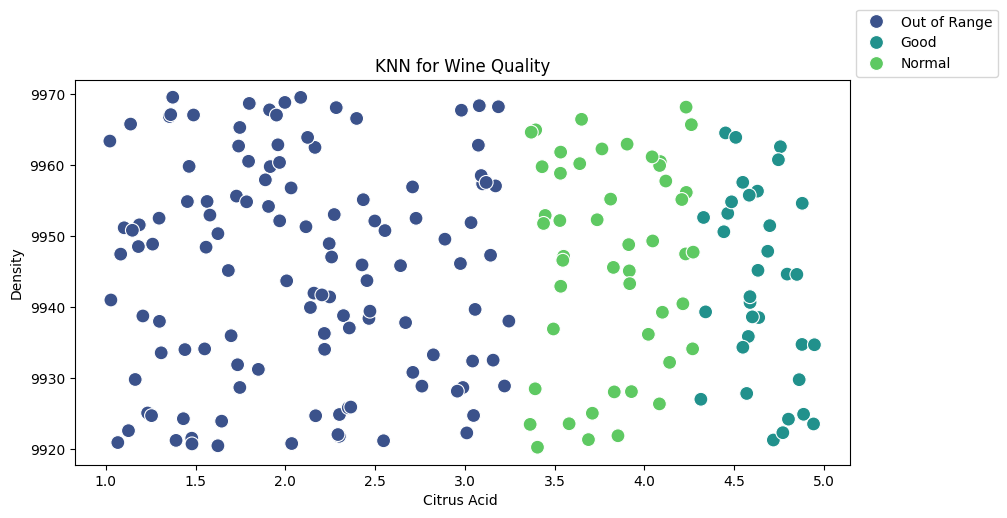

In [9]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=X, x=citrus_acid, y=density, hue=L_C.inverse_transform(Y), palette="viridis", s=100)
plt.title("KNN for Wine Quality")
plt.xlabel("Citrus Acid ")
plt.ylabel("Density")
plt.legend(loc="upper right", bbox_to_anchor=(1, 0.4, 0.2, 0.8))
plt.show()

Enter the Citrus Acid Content (1 to 5):  4
Enter the Density of Wine (9920 to 9970):  9920


Distance = [[0.64708339 1.3616644  1.45715834 1.87318796]]


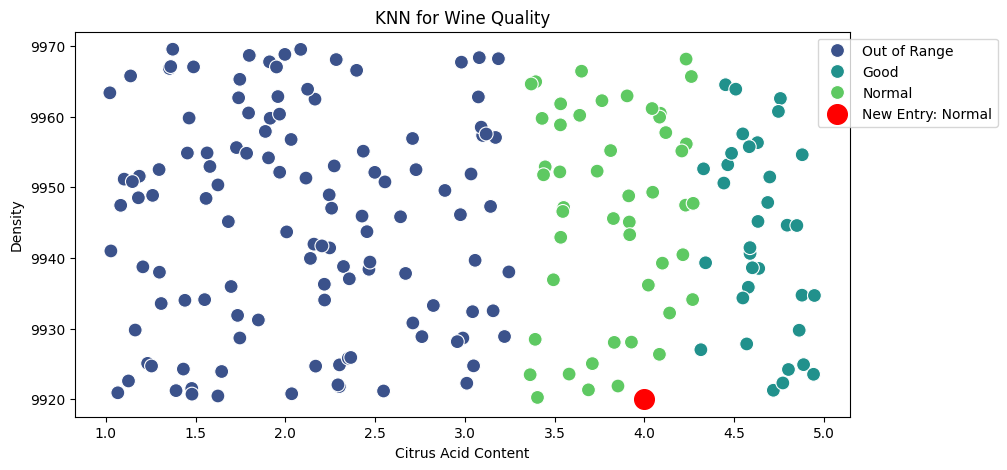

Citrus Acid Content = 4.0 | Density = 9920.0 | Predicted Category = Normal 


In [10]:
def predict_quality(data, model, L_C):
    p = model.predict(data)
    P_C = L_C.inverse_transform(p)[0]
    return P_C

# User Input for Prediction
user_acid = float(input("Enter the Citrus Acid Content (1 to 5): "))
user_density = float(input("Enter the Density of Wine (9920 to 9970): "))

input_data = np.array([[user_acid, user_density]])
predicted_category = predict_quality(input_data, model, L_C)

D, I = model.kneighbors(input_data, n_neighbors=4)

print(f"Distance = {D}")

plt.figure(figsize=(10, 5))
# Training data plot
sns.scatterplot(data=X, x=citrus_acid, y=density, hue=L_C.inverse_transform(Y), palette="viridis", s=100)

# Input data plot
plt.scatter(input_data[0, 0], input_data[0, 1], color='red', s=200, label=f'New Entry: {predicted_category}')
plt.title("KNN for Wine Quality")
plt.xlabel("Citrus Acid Content")
plt.ylabel("Density")
plt.legend(loc="upper right", bbox_to_anchor=(1, 0.2, 0.2, 0.8))
plt.show()

print(f"Citrus Acid Content = {user_acid} | Density = {user_density} | Predicted Category = {predicted_category} ")